In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('ipldata/matches.csv')

In [3]:
dataset.head(6)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN


### Which team has won/lost maximum number of matches while chasing?

In [4]:
dataset[((dataset['toss_winner'] == dataset['winner'])&(dataset['toss_decision'] == 'field'))|((dataset['toss_winner'] != dataset['winner'])&(dataset['toss_decision'] == 'bat'))].groupby('winner').count()['id'].sort_values()

winner
Kochi Tuskers Kerala            4
Rising Pune Supergiant          5
Rising Pune Supergiants         5
Pune Warriors                   6
Delhi Capitals                  7
Deccan Chargers                11
Gujarat Lions                  12
Sunrisers Hyderabad            28
Delhi Daredevils               42
Kings XI Punjab                44
Rajasthan Royals               46
Chennai Super Kings            49
Royal Challengers Bangalore    49
Mumbai Indians                 51
Kolkata Knight Riders          58
Name: id, dtype: int64

In [5]:
def looser(team1,team2,winner):
    looser = 0
    if team1 == winner:
        looser = team2
    else:
        looser = team1
    return looser

In [6]:
dataset['looser'] = dataset.apply(lambda x:looser(x.team1,x.team2,x.winner),axis=1)

In [7]:
dataset.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,looser
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,Royal Challengers Bangalore
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,Mumbai Indians
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,Gujarat Lions
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,Rising Pune Supergiant
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,Delhi Daredevils


In [8]:
dataset[((dataset['toss_winner'] != dataset['winner'])&(dataset['toss_decision'] == 'field'))|((dataset['toss_winner'] == dataset['winner'])&(dataset['toss_decision'] == 'bat'))].groupby('looser').count()['id'].sort_values()

looser
Rising Pune Supergiants         2
Delhi Capitals                  3
Kochi Tuskers Kerala            3
Rising Pune Supergiant          3
Gujarat Lions                   4
Sunrisers Hyderabad            17
Pune Warriors                  19
Deccan Chargers                21
Chennai Super Kings            26
Rajasthan Royals               32
Mumbai Indians                 35
Kolkata Knight Riders          37
Kings XI Punjab                41
Royal Challengers Bangalore    47
Delhi Daredevils               48
Name: id, dtype: int64

### Which toss decision is best for each ground?

In [9]:
toss = dataset[dataset['toss_winner'] == dataset['winner']].groupby(['venue','toss_decision'])['toss_decision'].size().unstack(fill_value=0)

In [10]:
def toss_dec(bat,field):
    pref = ''
    if bat >= field:
        pref = 'bat'
    else:
        pref = 'field'
    return pref

In [11]:
toss['Best toss decision'] = toss.apply(lambda x:toss_dec(x.bat,x.field),axis=1)

In [12]:
toss

toss_decision,bat,field,Best toss decision
venue,,,
ACA-VDCA Stadium,0,2,field
Barabati Stadium,2,3,field
Brabourne Stadium,4,3,bat
Buffalo Park,2,0,bat
De Beers Diamond Oval,1,1,bat
Dr DY Patil Sports Academy,3,6,field
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,2,2,bat
Dubai International Cricket Stadium,1,2,field
Eden Gardens,12,31,field


### Which batsman has played maximum number of dot balls

In [13]:
deli = pd.read_csv('ipldata/deliveries.csv')

In [14]:
deli['player_dismissed'].fillna("No",inplace=True)

In [15]:
deli[(deli['total_runs'] == 0 ) & (deli['player_dismissed'] == 'No')]['batsman'].value_counts()

V Kohli              1223
S Dhawan             1184
RG Sharma            1136
CH Gayle             1128
RV Uthappa           1068
SK Raina             1065
G Gambhir            1040
DA Warner            1004
AM Rahane             981
SR Watson             908
MS Dhoni              859
PA Patel              804
JH Kallis             790
BB McCullum           782
KD Karthik            780
M Vijay               779
AT Rayudu             757
Yuvraj Singh          756
AB de Villiers        739
MK Pandey             718
R Dravid              671
SR Tendulkar          658
DR Smith              657
YK Pathan             639
SE Marsh              585
AC Gilchrist          553
KA Pollard            536
MEK Hussey            521
SC Ganguly            513
NV Ojha               508
                     ... 
A Choudhary             2
A Chandila              2
L Ablish                2
S Randiv                2
J Searles               2
FH Edwards              2
U Kaul                  1
DAJ Bracewel

### Which batsmen came to crease but never got a chance to face a ball?

In [16]:
batsman = deli.batsman.unique()

In [17]:
nonstriker = deli.non_striker.unique()

In [18]:
mylist = []

In [19]:
for x in nonstriker:
    if x not in batsman:
        mylist.append(x)

In [20]:
mylist

['A Nel', 'C Ganapathy', 'TP Sudhindra', 'BW Hilfenhaus']

### Which bowler has hit for maximum number of 1s/2s/3s/4s/6s?

In [21]:
deli.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,No,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,No,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,No,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,No,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,No,NaN,NaN


In [22]:
one = deli.groupby(['bowler','total_runs'])['bowler'].size().unstack(fill_value=0)

In [23]:
one[one[1] == one[1].max()]

total_runs,0,1,2,3,4,5,6,7,8,10
bowler,,,,,,,,,,
Harbhajan Singh,1244,1549,203,14,295,3,143,0,0,0


In [24]:
one[one[2] == one[2].max()]

total_runs,0,1,2,3,4,5,6,7,8,10
bowler,,,,,,,,,,
DJ Bravo,825,1189,258,7,294,2,133,1,2,0


In [25]:
one[one[3] == one[3].max()]

total_runs,0,1,2,3,4,5,6,7,8,10
bowler,,,,,,,,,,
P Kumar,1075,923,167,18,343,7,104,0,0,0


In [26]:
one[one[4] == one[4].max()]

total_runs,0,1,2,3,4,5,6,7,8,10
bowler,,,,,,,,,,
UT Yadav,942,959,180,15,389,4,113,2,1,0


In [27]:
one[one[6] == one[6].max()]

total_runs,0,1,2,3,4,5,6,7,8,10
bowler,,,,,,,,,,
PP Chawla,1100,1311,245,9,312,7,171,0,2,0


### Which batsman got stumped out maximum number of times?

In [28]:
dismissal = deli.groupby(['batsman','dismissal_kind'])['dismissal_kind'].size().unstack(fill_value=0)

In [29]:
dismissal[dismissal['stumped'] == dismissal['stumped'].max()]

dismissal_kind,bowled,caught,caught and bowled,hit wicket,lbw,obstructing the field,retired hurt,run out,stumped
batsman,,,,,,,,,
SK Raina,16,112,7,0,6,0,0,12,8


### Which non-striker has been part of maximum number of runouts?

In [30]:
runout = deli.groupby(['non_striker','dismissal_kind'])['dismissal_kind'].size().unstack(fill_value=0)

In [31]:
runout[runout['run out'] == runout['run out'].max()]

dismissal_kind,bowled,caught,caught and bowled,hit wicket,lbw,obstructing the field,retired hurt,run out,stumped
non_striker,,,,,,,,,
KD Karthik,24,97,9,0,7,0,1,16,4
SK Raina,25,104,3,0,15,0,0,16,7


## The most successful IPL Team

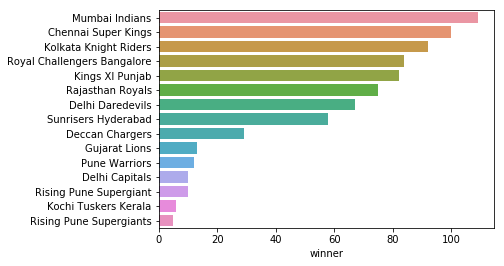

In [32]:
data = dataset.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h');

### Top player of the match Winners

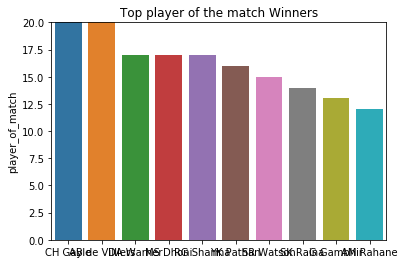

In [33]:
top_players = dataset.player_of_match.value_counts()[:10]
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
sns.barplot(x = top_players.index, y = top_players, orient='v'); #palette="Blues");
plt.show()

### Has Toss-winning helped in Match-winning?

In [34]:
ss = dataset['toss_winner'] == dataset['winner']

ss.groupby(ss).size()

False    363
True     393
dtype: int64

### Which Team had won by (closest margin) minimum runs?

In [35]:
dataset[dataset[dataset['win_by_runs'].ge(1)].win_by_runs.min() == dataset['win_by_runs']]['winner']

58                  Mumbai Indians
105                Kings XI Punjab
163                Kings XI Punjab
344               Delhi Daredevils
350                 Mumbai Indians
518            Chennai Super Kings
598                  Gujarat Lions
614    Royal Challengers Bangalore
734    Royal Challengers Bangalore
755                 Mumbai Indians
Name: winner, dtype: object

### Which season had most number of matches?

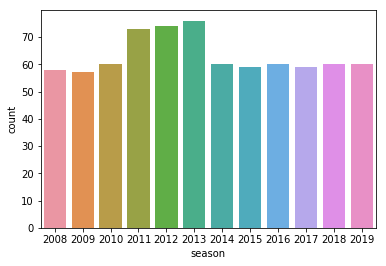

In [36]:
sns.countplot(x='season', data=dataset)
plt.show()